# TASK 2

### MT2022161 - ADITYA.M

In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
x_train = np.linspace(-1,1,200)
x_train=x_train.reshape(x_train.shape[0],1)
x_train.shape

(200, 1)

In [3]:
y_train = []
for i in range(200):
    if(-0.5<=x_train[i]<0.1 or 0.5<=x_train[i]):
        y_train.append(1)
    else:
        y_train.append(-1)
y_train = np.array(y_train)


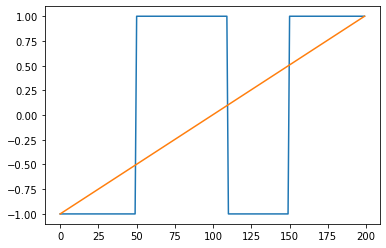

In [4]:
plt.plot(y_train)
plt.plot(x_train)
plt.show()

##### Below function "creat_polynomial_regression_model" will take degree and training data(x_train,y_train) as input  and fits it to a polynomial regression model of given degree. Then using the model generated it will  predict y_pred for the x_train and then returns the error rate between the sign(y_pred) and sign(y).

In [5]:
from sklearn.preprocessing import PolynomialFeatures
def create_polynomial_regression_model(degree,x_train,y_train,plotting=False):  
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_train)
    y_train_predicted = poly_model.predict(x_train_poly) 
    y_sign=np.sign(y_train_predicted)
    if plotting==True:
        plt.title("For degree:"+str(degree))
        plt.ylim([-1.5, 1.5])
        plt.xlim([-1.1, 1.1])
        plt.plot(x_train, y_train_predicted, color='m',label='f(x)')
        plt.plot(x_train,y_sign,label='sign(f(x))')
        plt.plot(x_train,y_train,linestyle = 'dotted',label='y')
        plt.legend()
        plt.show()
        rmse_train = mean_squared_error(y_train, y_sign)
        print("RMSE of training set is:"+str(rmse_train))
    errorcount=0
    for i in range(y_sign.shape[0]):
        if y_sign[i]!=y_train[i]:
            errorcount+=1
    return (errorcount/y_train.shape[0])*100

In [6]:
errorRates = []
for i in range(9):
    errorRate = create_polynomial_regression_model(i,x_train,y_train)
    errorRates.append(errorRate)
errorRates=np.array(errorRates)
errorRates=errorRates.reshape(errorRates.shape[0],1)

### a.)Evaluate the error rate on the training data set. Does the error rate decrease when you increase the degree.

#### From the below plot we can observe that  error rate increases as the degree of the of the polynomial classifier increases from 3 to 4. 

#### Even though we might think that increasing the degree of the polynomial should decrease the error rate atleast with respect to the training data(because the model will over fit) but here error rate increases when degree of the classifier is increased from 3 to 4. This is because we are trying to fit our model by reducing RMSE between f(x) and y and not sign(f(x)) and y. Hence polynomial classifier of degree 4 might predicts f(x) better than polynomial classifier of degree 3, but when it comes to predicting the sign(f(x)) it performs worst.

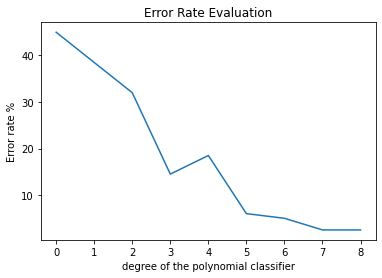

In [7]:
x=np.arange(0,9)
y=errorRates
plt.plot(x,y)
plt.title('Error Rate Evaluation')
plt.xlabel('degree of the polynomial classifier')
plt.ylabel('Error rate %')
plt.show()

### b.) Plotting f(x) and sign(f(x)) for least squares classifier of all degrees from 0 till 8

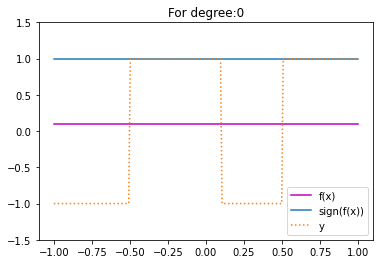

RMSE of training set is:1.8
error rate is : 45.0


In [8]:
error=create_polynomial_regression_model(0,x_train,y_train,plotting=True)
print('error rate is :',error)

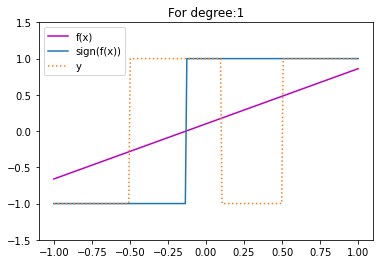

RMSE of training set is:1.54
error rate is : 38.5


In [9]:
error=create_polynomial_regression_model(1,x_train,y_train,plotting=True)
print('error rate is :',error)

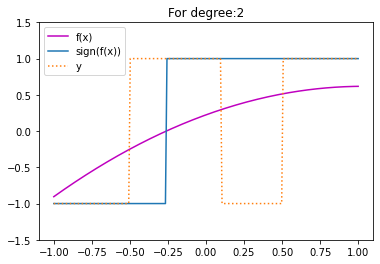

RMSE of training set is:1.28
error rate is : 32.0


In [10]:
error=create_polynomial_regression_model(2,x_train,y_train,plotting=True)
print('error rate is :',error)

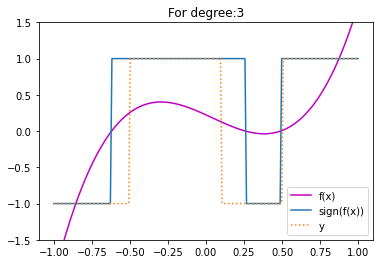

RMSE of training set is:0.58
error rate is : 14.499999999999998


In [11]:
error=create_polynomial_regression_model(3,x_train,y_train,plotting=True)
print('error rate is :',error)

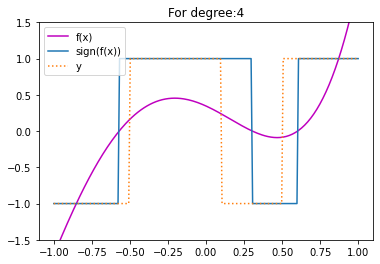

RMSE of training set is:0.74
error rate is : 18.5


In [12]:
error=create_polynomial_regression_model(4,x_train,y_train,plotting=True)
print('error rate is :',error)

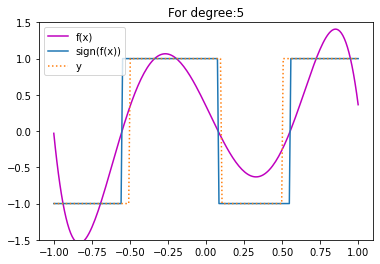

RMSE of training set is:0.24
error rate is : 6.0


In [13]:
error=create_polynomial_regression_model(5,x_train,y_train,plotting=True)
print('error rate is :',error)

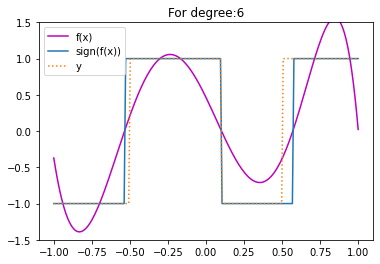

RMSE of training set is:0.2
error rate is : 5.0


In [14]:
error=create_polynomial_regression_model(6,x_train,y_train,plotting=True)
print('error rate is :',error)

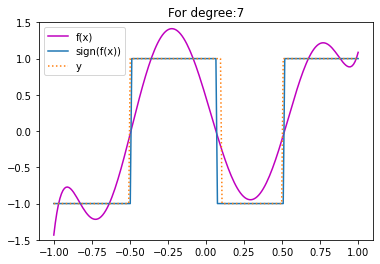

RMSE of training set is:0.1
error rate is : 2.5


In [15]:
error=create_polynomial_regression_model(7,x_train,y_train,plotting=True)
print('error rate is :',error)

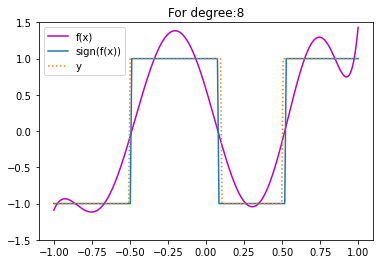

RMSE of training set is:0.1
error rate is : 2.5


In [16]:
error=create_polynomial_regression_model(8,x_train,y_train,plotting=True)
print('error rate is :',error)

###  c.) Is it possible to classify this data set perfectly using a classifier f(x)=sign(f(x)) ,where f(x)=c(x+0.5)(x-0.1)(x-0.5)

#### 'Classifier' function takes training data(x_train,y_train) as input along with a constant c and then fits the given x_train to  y_pred=c(x+0.5)(x-0.1)(x-0.5) and then returns error rate between sign(y_train) and sign(y_pred) as output.

In [17]:
import copy
def Classifier(x_train,y_train,c=2,plotting=False): 
    k_train=copy.deepcopy(x_train)
    for i in range(x_train.shape[0]): 
        x=x_train[i]
        k_train[i]=(x+0.5)*(x-0.5)*(x-0.1)
        
    y_train_predicted=copy.deepcopy(k_train)
    y_sign=copy.deepcopy(k_train)
    for i in range(x_train.shape[0]): 
        y_train_predicted[i]=c*k_train[i]
        if y_train_predicted[i]>=0:
            y_sign[i]=1
        else: 
            y_sign[i]=-1
    
    if plotting==True:
        plt.title("For  f(x)=c(x+0.5)(x-0.1)(x-0.5), with c="+str(c))
        plt.ylim([-1.5, 1.5])
        plt.xlim([-1.1, 1.1])
        plt.plot(x_train, y_train_predicted, color='r',label='f(x)')
        plt.plot(x_train,y_sign,label='sign(f(x))')
        plt.plot(x_train,y_train,linestyle = 'dotted',label='y')
        plt.legend()
        plt.show()
        rmse_train = mean_squared_error(y_train, y_sign)
        print("RMSE of training set is:"+str(rmse_train))
    errorcount=0
    for i in range(y_sign.shape[0]):
        if y_sign[i]!=y_train[i]:
            errorcount+=1
    return (errorcount/y_train.shape[0])*100

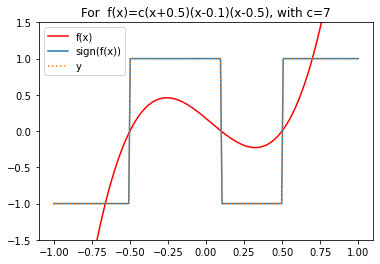

RMSE of training set is:0.0
error rate is : 0.0


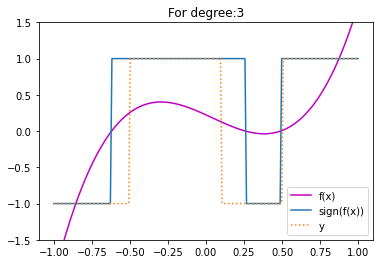

RMSE of training set is:0.58
error rate is : 14.499999999999998


In [18]:
error=Classifier(x_train,y_train,c=7,plotting=True)
print('error rate is :',error)
error=create_polynomial_regression_model(3,x_train,y_train,plotting=True)
print('error rate is :',error)

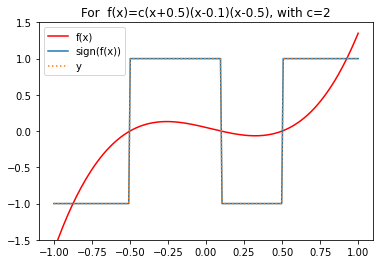

RMSE of training set is:0.0
error rate is : 0.0


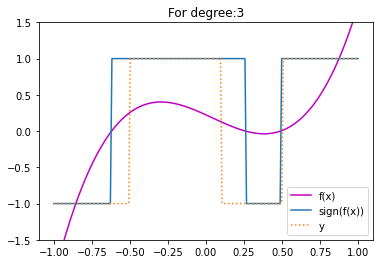

RMSE of training set is:0.58
error rate is : 14.499999999999998


In [19]:
error=Classifier(x_train,y_train,c=2,plotting=True)
print('error rate is :',error)
error=create_polynomial_regression_model(3,x_train,y_train,plotting=True)
print('error rate is :',error)

#### The equation f(x)=c(x+0.5)(x-0.1)(x-0.5) perfectly classifies the training data when compared to the polynomial classifier of 3rd degree.

#### the RMSE is trying to fit by minimize the error between f(x) and y which is not same as minimizing the error between sign(f(x)) and y. Hence our 3rd degree polynomial classifier will not perfectly fit the training data.